<a href="https://colab.research.google.com/github/juliosdutra/ModelagemPPEQ1019/blob/main/modelo_classif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""
Created on Fri Nov 06 10:08:11 2020

@author: Julio Dutra
"""

import numpy as  np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix


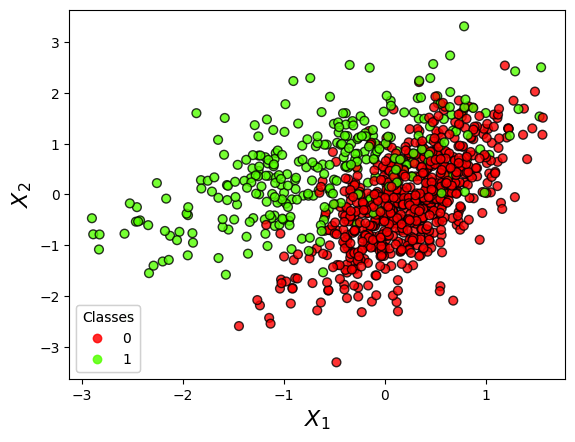

In [3]:
#%% Geração dos dados
plt.close('all')
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.70], flip_y=0,
                           random_state=7, class_sep = 1.5, hypercube = False)

fig, ax = plt.subplots()
scatter = ax.scatter(X[:,0], X[:,1], c=y,
                     cmap=plt.cm.prism, edgecolor='k', s=40, alpha=0.80)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)
plt.xlabel(r'$X_1$', fontsize=16)
plt.ylabel(r'$X_2$', fontsize=16);

In [4]:
#%% Ler os dados e realizar verificações básicas.

print(X.shape)
print(y.shape)
print(np.unique(y))

(1000, 2)
(1000,)
[0 1]


In [5]:
#%% Adimensionalizar ou padronizar os dados.

s = MinMaxScaler(feature_range=(-1,1))

Xs = s.fit_transform(X)

#%% Criar os conjuntos de dados de treinamento e teste.

X_treino, X_teste, y_treino, y_teste = train_test_split(Xs, y,
                                    test_size=0.25, random_state=2020)


#%% Construir, predizer e avaliar o modelo de rede neural.

rede = MLPClassifier(solver='adam', alpha=1e-3, activation = 'relu',
                     hidden_layer_sizes=(100, 100), max_iter=10000,
                     random_state=22031012)

modelo = rede.fit(X_treino,y_treino)

y_pred_treino = modelo.predict(X_treino)

y_pred_teste = modelo.predict(X_teste)


In [6]:
# O elemento i-ésimo na lista representa a matriz
# de pesos correspondentes à camada i.
print('\n Lista de pesos: \n', modelo.coefs_ )

# O elemento i-ésimo na lista representa o vetor
# de bias correspondentes à camada i+1.
print('\n Lista de bias:  \n', modelo.intercepts_ )

# Informação adicional
print('\n Número de camadas:', modelo.n_layers_)
print('\n Número de saídas:', modelo.n_outputs_)
print('\n Número de iterações:', modelo.n_iter_)
print('\n Valor da função objetivo: %1.5e' % modelo.loss_)
print('\n Função de ativação da saída:', modelo.out_activation_)
print('\n Tamanho da camada escondida:', modelo.hidden_layer_sizes)

print('Conf matrix (treino): \n', confusion_matrix(y_treino, y_pred_treino),'\n')
print('Conf matrix (teste):\n', confusion_matrix(y_teste, y_pred_teste),'\n')
print(' Accuracy (treino):', modelo.score(X_treino, y_treino) ,'\n' )
print(' Accuracy (teste):', modelo.score(X_teste, y_teste) ,'\n' )
print( 'Probabilidade: \n', modelo.predict_proba(X_teste[0:5]))




 Lista de pesos: 
 [array([[ 6.14607473e-02,  8.34583679e-18,  2.31665580e-01,
         2.63474624e-01, -1.65766538e-01,  3.20849387e-02,
         2.54284225e-01,  3.55496650e-01,  2.11876706e-01,
        -5.49482252e-11,  3.13468095e-01, -3.58074424e-01,
        -5.63854966e-02,  1.17366833e-02,  1.17818902e-01,
         8.79100633e-15, -1.71513810e-02,  8.05982436e-02,
        -3.20626722e-01, -3.76399097e-01, -3.98205054e-01,
        -1.55620183e-01, -1.34831212e-01, -1.46032924e-01,
         3.21030862e-01,  4.43299852e-16,  3.44207963e-02,
         1.43439912e-01,  1.40692442e-01, -1.38057225e-01,
         2.02373344e-01,  1.76509710e-01, -1.97490585e-02,
        -2.60433797e-01, -2.67945512e-01, -2.24096022e-17,
        -1.41229491e-01, -4.60953806e-02,  2.30306145e-01,
         1.28401217e-01, -4.31490009e-01, -3.50406067e-01,
         5.83573498e-02, -5.59418840e-01, -6.56102951e-02,
        -2.96817911e-01,  2.99842191e-01, -3.25089139e-01,
         1.19102552e-01,  1.2777804

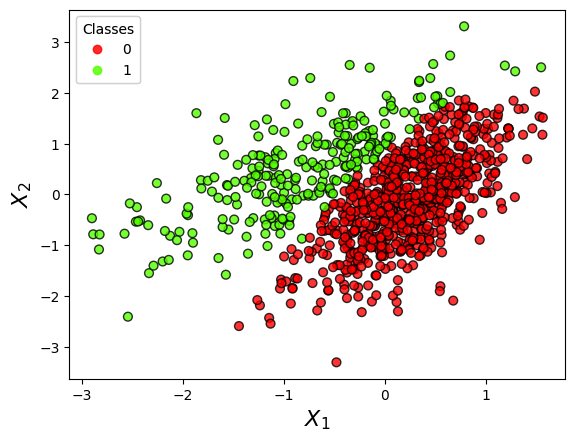

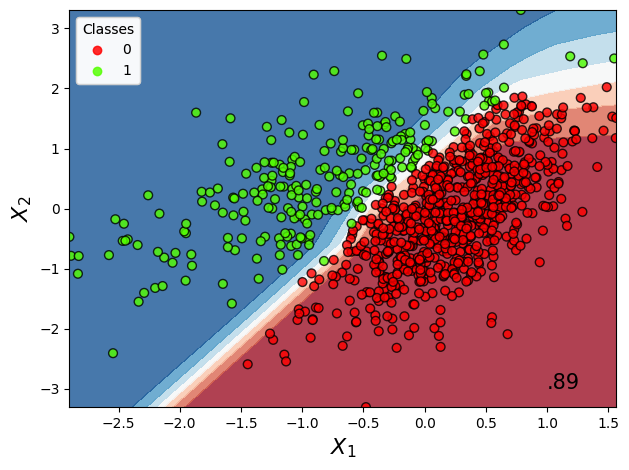

In [7]:
#%% saídas gráficas
fig, ax = plt.subplots()
y_pred = modelo.predict(Xs)
scatter = ax.scatter(X[:,0], X[:,1], c=y_pred,
                     cmap=plt.cm.prism, edgecolor='k', s=40, alpha=0.80)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="best", title="Classes")
ax.add_artist(legend1)
plt.xlabel(r'$X_1$', fontsize=16)
plt.ylabel(r'$X_2$', fontsize=16)

###
n = 1000
fig, ax = plt.subplots()

xx1, xx2 = np.meshgrid(np.linspace(-1, 1, n), np.linspace(-1, 1, n))
Z = modelo.predict_proba(np.c_[xx1.ravel(), xx2.ravel()])[:, 1]

Z = Z.reshape(xx1.shape)

xx1, xx2 = np.meshgrid(np.linspace(min(X[:,0]), max(X[:,0]), n),
                       np.linspace(min(X[:,1]), max(X[:,1]), n))

ax.contourf(xx1, xx2, Z, cmap=plt.cm.RdBu, alpha=0.80)

scatter = ax.scatter(X[:,0], X[:,1], c=y_pred,
                     cmap=plt.cm.prism, edgecolor='k', s=40, alpha=0.80)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="best", title="Classes")

ax.add_artist(legend1)
plt.xlabel(r'$X_1$', fontsize=16)
plt.ylabel(r'$X_2$', fontsize=16)
ax.text(xx1.max() - .3, xx2.min() + .3,
        ('%.2f' % modelo.score(X_teste, y_teste)).lstrip('0'),
                size=15, horizontalalignment='right')
plt.tight_layout()
plt.show()